
## Machine Learning


### Problem

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.


They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. The
company wants to know:


● Which variables are significant in predicting the price of a car.

● How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.

## Step 1 : Understand the Business Problem.

***
## Objective

You are required to model the prices of cars with the available independent variables. It will be
used by management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet
certain price levels. Further, the model will be good for management to understand the pricing
dynamics of the new market.
***

## Step 2 : Import all the libraries and set up all the requirements that you will need.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[12,7]

## Step 3: Import the data set and check the following
- dimension of the dataset.
- data types.
- Missing value available in the dataset.
- Descriptive statistics of data and write the observation.


In [2]:
#  Import the data set
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# dimension of the dataset.
print('Shape of the Dataset is ',df.shape)
print('Dimension of the dataset is ',df.ndim)

Shape of the Dataset is  (205, 26)
Dimension of the dataset is  2


In [4]:
# data types
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
# assingning the dtypes correctly
df['car_ID']=df['car_ID'].astype(object)

In [6]:
# Missing value available in the dataset
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no missing values in the dataset

In [7]:
# Descriptive statistics of data and write the observation.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


#### Observation:
* From the count we can say that there is no missing values
* The mean of the features can be observed from the above and the price have the mean 13276.71
* For the price the median is 10295 which says that there are few outliers.
* The minimum price is 5118 and maximum price is 45400

## Step 4: Data Cleaning
- Create the column as 'CompanyName' using 'CarName' Column. List down the unique 'CompanyName'.
- Check the correctness of data in the 'CompanyName' column.
- Check the duplicate data in the dataset.

In [8]:
# Create the column as 'CompanyName' using 'CarName' Column.
df['Company_name']=list(map(lambda x: x.split(' ')[0],df['CarName']))
df.insert(loc=3,column='Company_name',value=df.pop('Company_name'))
df['Company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# cleaning the company_name
df['Company_name']=df['Company_name'].replace({'maxda':'mazda','Nissan':'nissan',
                                               'toyouta':'toyota','vokswagen':'volkswagen',
                                              'vw':'volkswagen'})

In [10]:
df['Company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# Check the duplicate data in the dataset.
df[df.duplicated()]

,car_ID,symboling,CarName,Company_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [12]:
# There are no duplicated entries

## Step 5: Exploratory Data Analysis
- Visualize the 'price' column using displot and boxplot. Write down the observations.

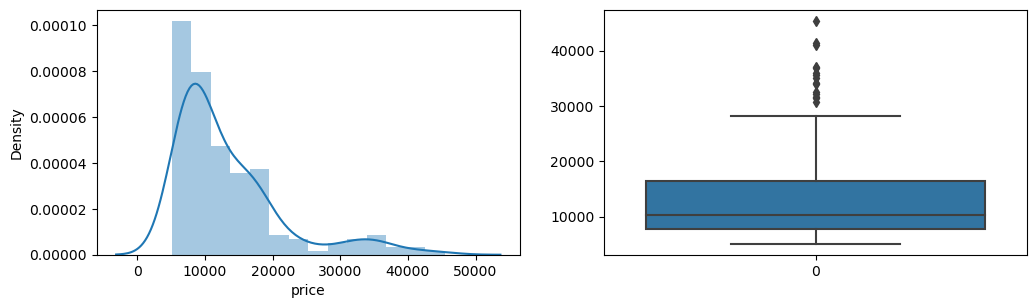

In [13]:
# Visualize the 'price' column using displot and boxplot
plt.subplot(2,2,1)
sns.distplot(df.price)
plt.subplot(2,2,2)
sns.boxplot(df.price)
plt.show()

**inference**
* That the price column is right-skewed
* The Price column have outliers
* The median for price is approximetely 10000

#### Perform the appropriate transformation to make the target as a gaussian distribution.

In [14]:
# copying the dataset and making changes in that 
df1=df.copy()
df1.head(2)

,car_ID,symboling,CarName,Company_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [15]:
# Before transformation 
df1.price.skew()

1.7776781560914454

The skewness of the price column is  0.672888533977329


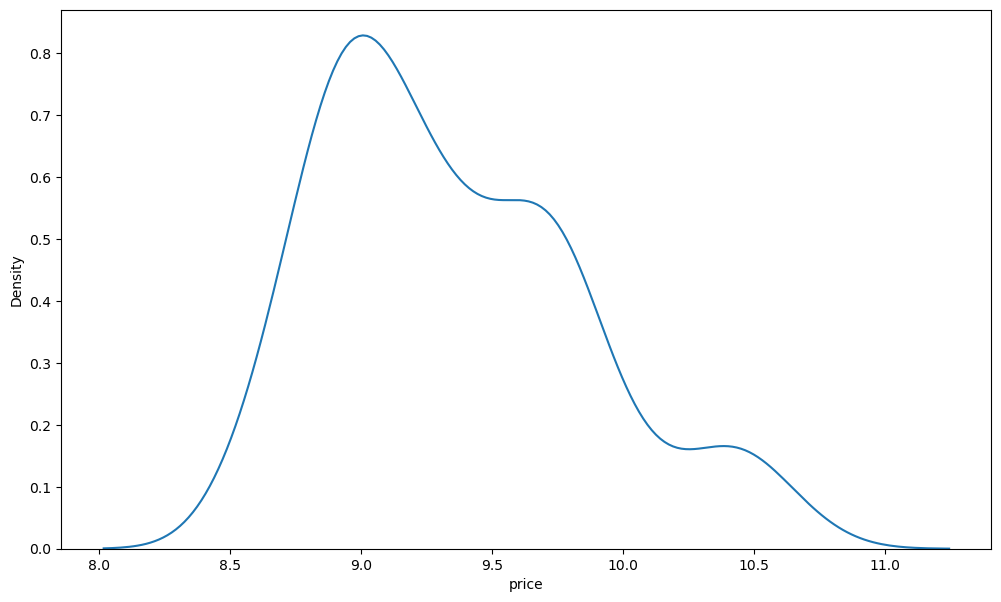

In [16]:
# after transformation
df1.price=np.log(df.price)
sns.kdeplot(df1.price)
print('The skewness of the price column is ',df1.price.skew())
plt.show()

#### Check the linear relationship between the dependent variable "Price" and the numerical independent variables

In [17]:
num_cols=df1.select_dtypes(include=np.number).columns
cat_cols=df1.select_dtypes(exclude=np.number).columns
num_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

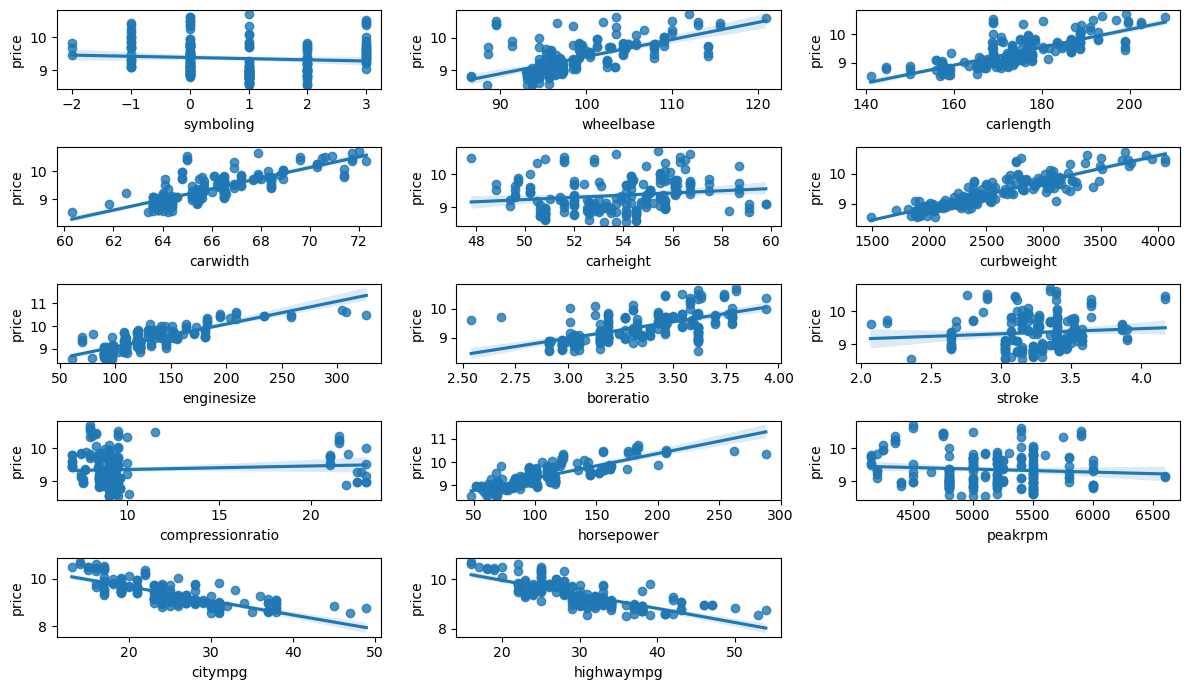

In [18]:
cols=['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']
it=1
for i in cols:
    plt.subplot(5,3,it)
    sns.regplot(x=i,y='price',data=df1)
    it+=1
plt.tight_layout()
plt.show()

There is a linear realtionship with the features
* carlength
* carwidth
* curbweight
* enginesize
* boreratio
* horsepower
* citympg
* highwaympg

#### - Checking the multicollinearity between the correlated independent variables above and Price

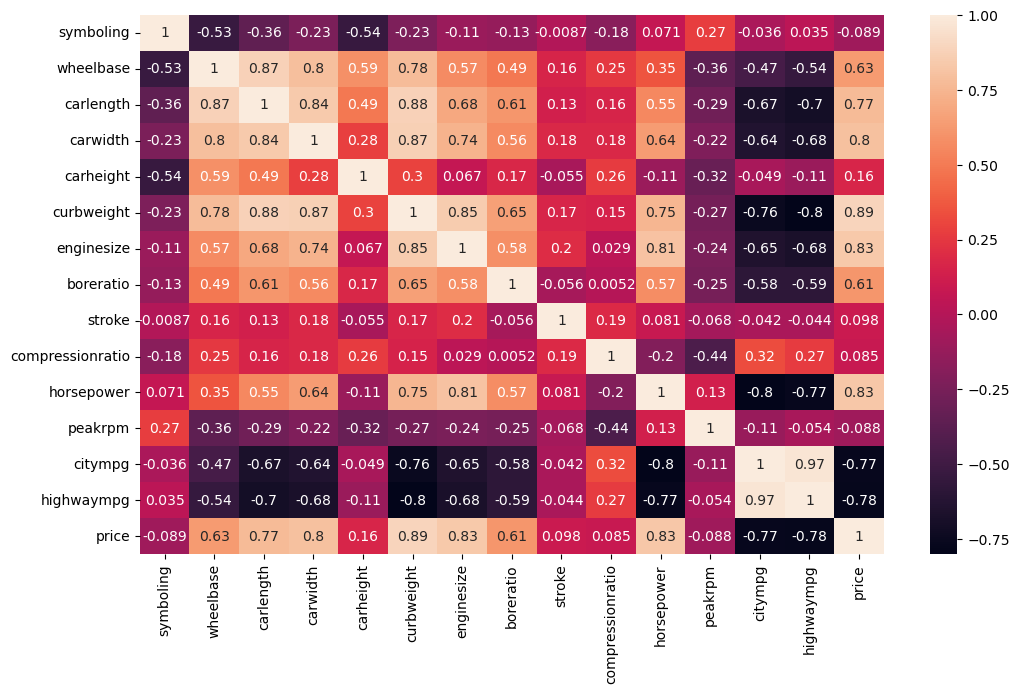

In [19]:
# multicollinearity
sns.heatmap(df1.corr(),annot=True)
plt.show()

**inference**
* curbweight, horsepower,enginesize,carwidth,carlength w.r.t price have a high correlation.
 
**mutlicollinearity between independent variables**
* wheelbase w.r.t carlength,carwidth,curbweight
* carlength w.r.t carwidth,curbweight
* carwidth,curbweight,horsepower w.r.t enginesize.
* citympg,highwaympg has a negative correlation. 

####  Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the Target variables.

### Univariate analysis

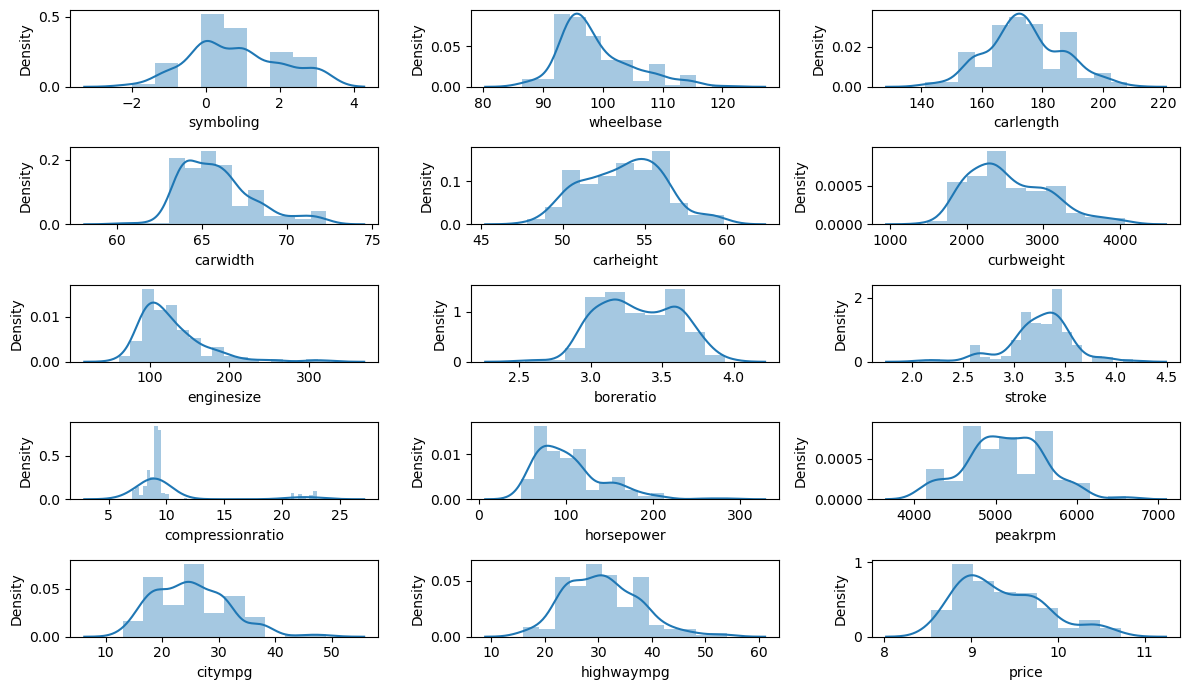

In [20]:
# numerical
it=1
for i in num_cols:
    plt.subplot(5,3,it)
    sns.distplot(df1[i])
    it+=1
plt.tight_layout()
plt.show()

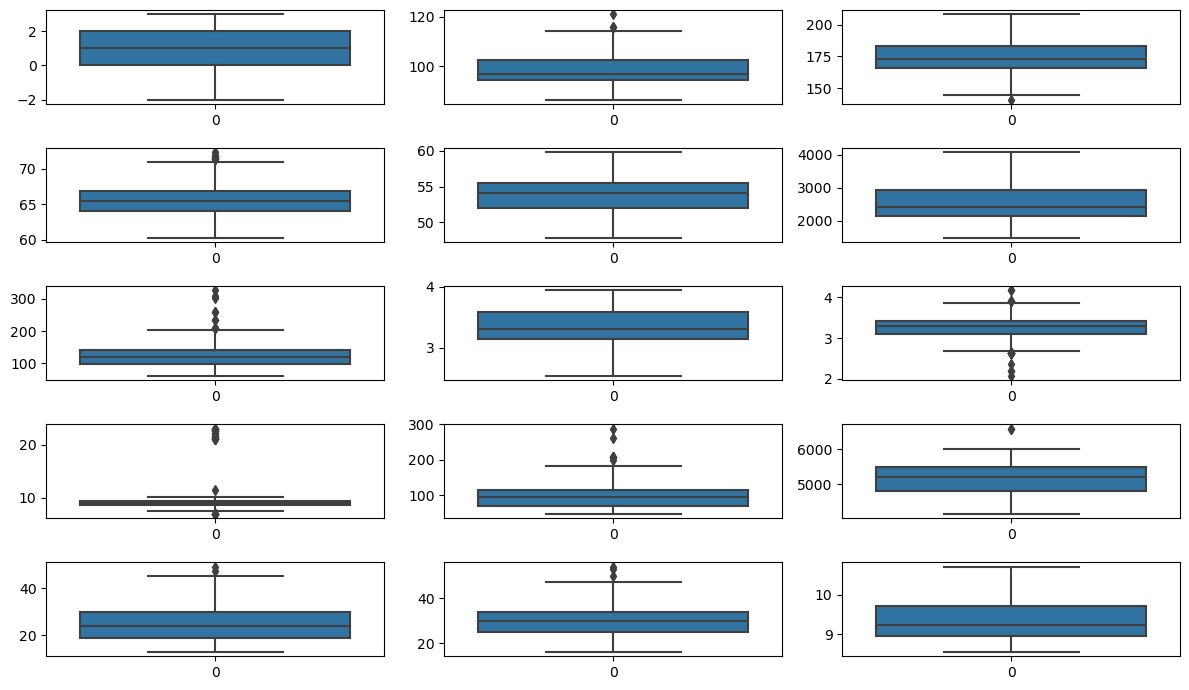

In [21]:
# numerical
it=1
for i in num_cols:
    plt.subplot(5,3,it)
    sns.boxplot(df1[i])
    it+=1
plt.tight_layout()
plt.show()

In [22]:
cat_cols

Index(['car_ID', 'CarName', 'Company_name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

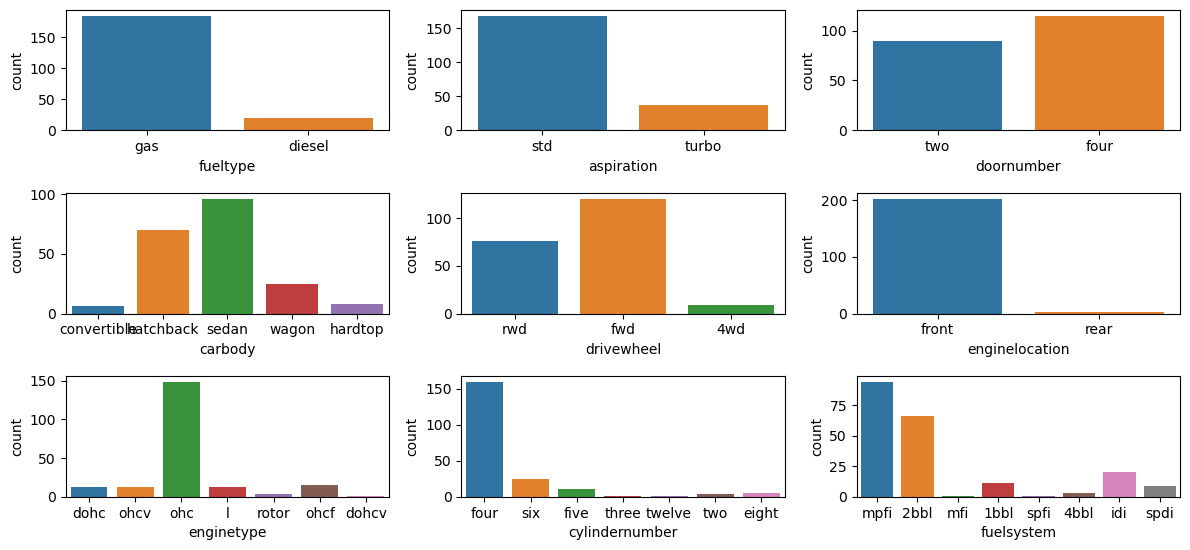

In [23]:
# categorical
cols=[ 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem']
it=1
for i in cols:
    plt.subplot(4,3,it)
    sns.countplot(x = df1[i])
    it+=1
plt.tight_layout()
plt.show()

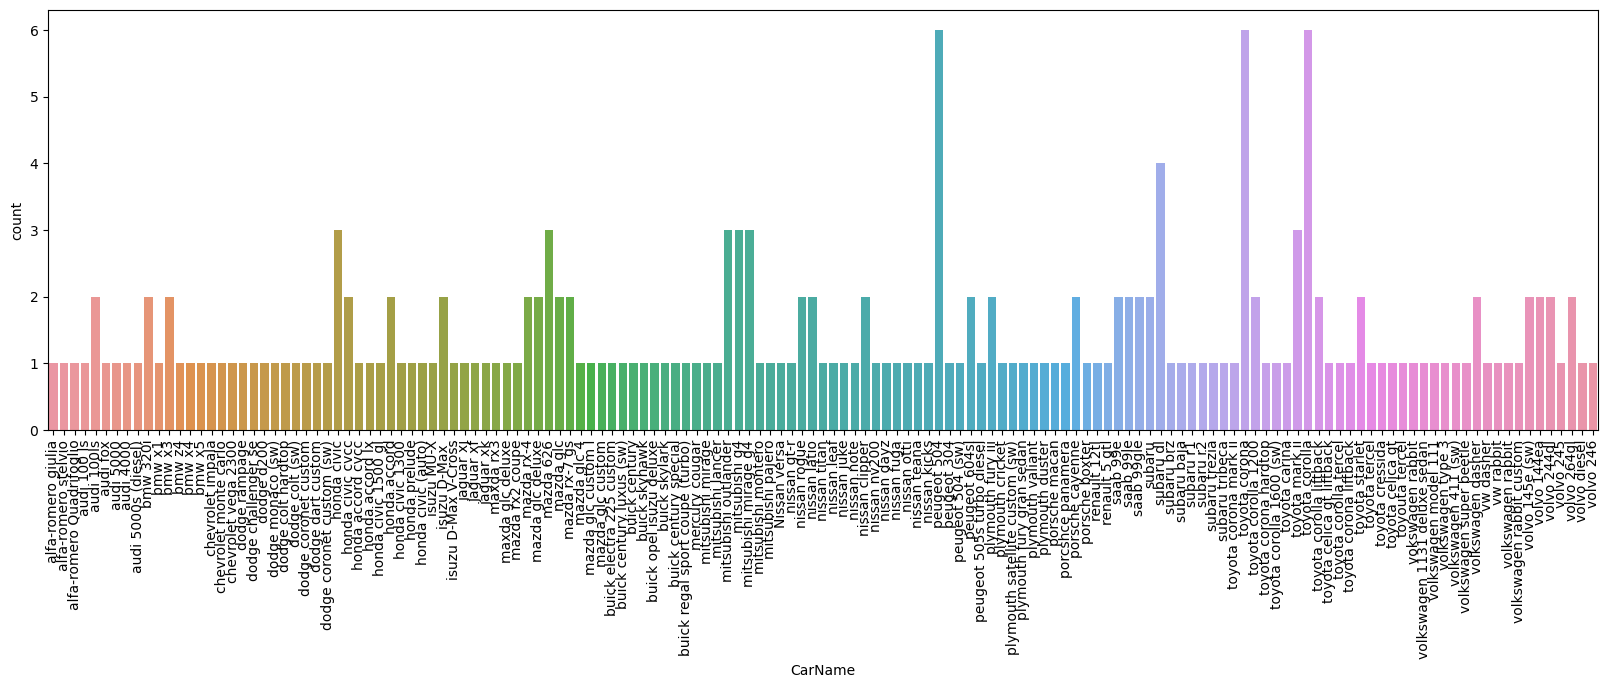

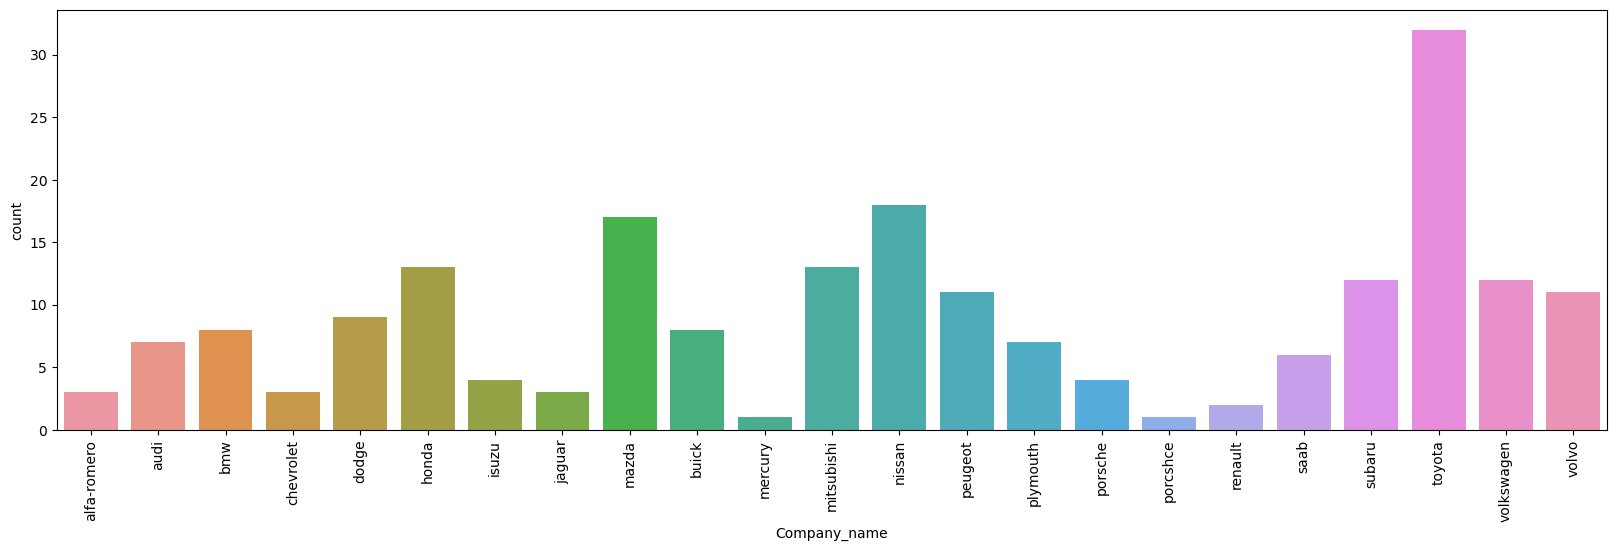

In [24]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.countplot(x = df1['CarName'])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(20,12))
plt.subplot(2,1,2)
sns.countplot(x = df1['Company_name'])
plt.xticks(rotation=90)
plt.show()

### Bivariate analysis

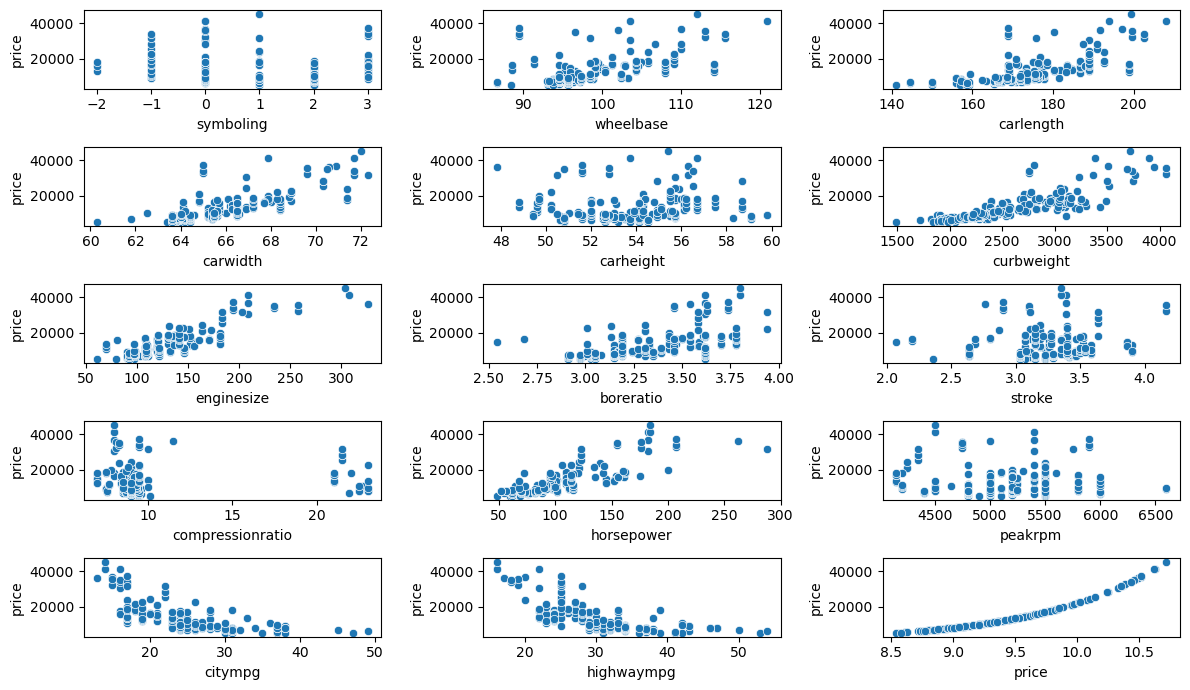

In [25]:
# num-num
it=1
for i in num_cols:
    plt.subplot(5,3,it)
    sns.scatterplot(x = df1[i],y = df.price)
    it+=1
plt.tight_layout()
plt.show()

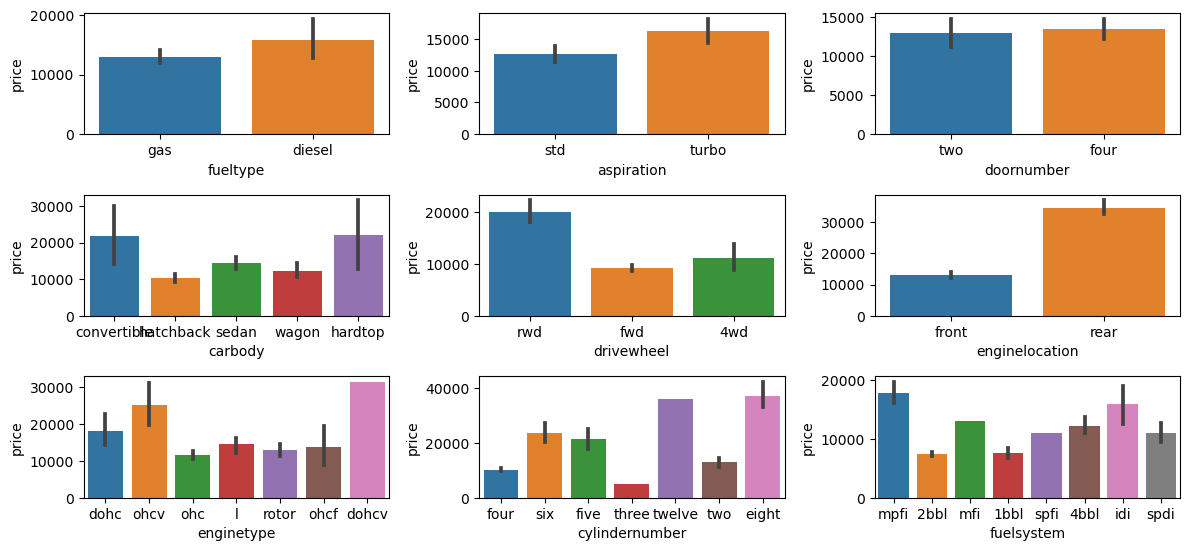

In [26]:
# num-cat
it=1
for i in cols:
    plt.subplot(4,3,it)
    sns.barplot(x = df1[i],y = df.price)
    it+=1
plt.tight_layout()
plt.show()

### Multivariate analysis

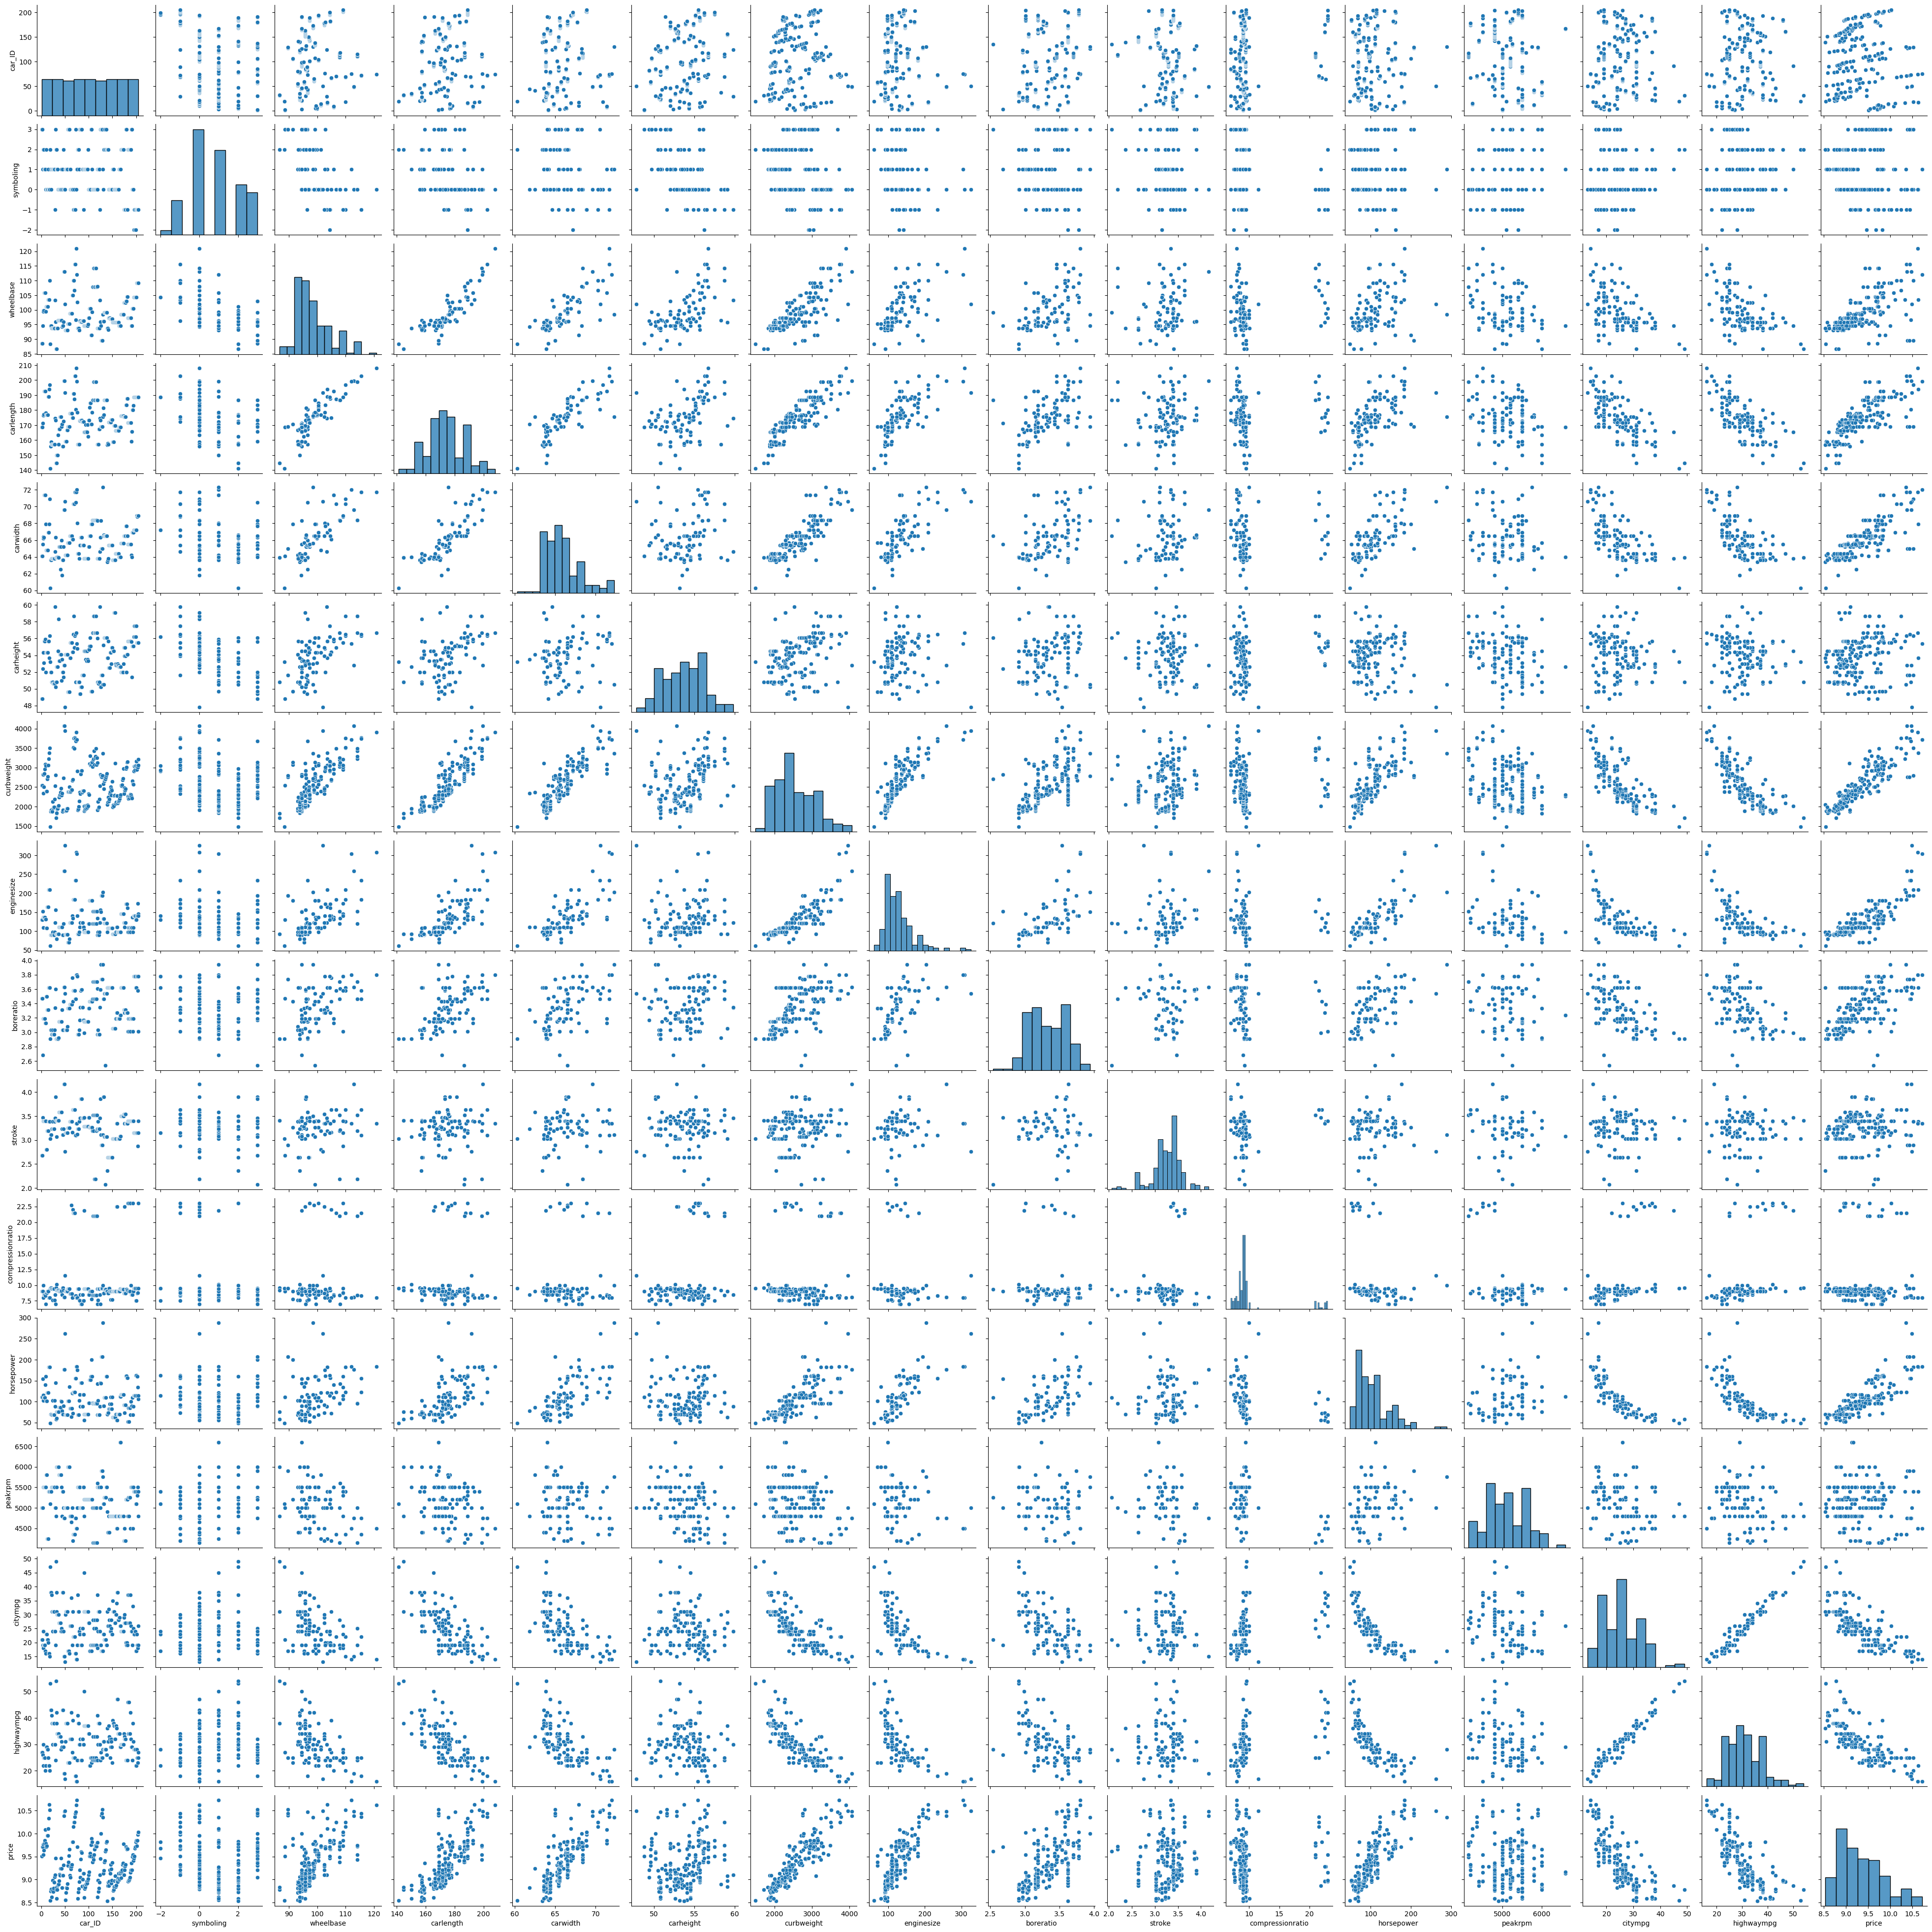

In [27]:
sns.pairplot(df1)
plt.show()

####  Perform feature engineering based on sound knowledge of the business problem and available dataset.


In [28]:
# create a dataframe and doing numerical feature engineering
f_df=df1.copy()
f_df['avg_mpg'] = (df1.highwaympg + df1.citympg)/2
f_df['car_density'] = df1.curbweight/(df1.carlength*df1.carwidth*df1.carheight)
f_df.drop(['highwaympg', 'citympg', 'carwidth', 'carlength','carheight','curbweight', 'wheelbase'], axis=1, inplace=True)
f_df.head()

,car_ID,symboling,CarName,Company_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg,car_density
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,9.510075,24.0,0.004826
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,9.711116,24.0,0.004826
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,9.711116,22.5,0.004804
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,9.543235,27.0,0.003681
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,9.767095,20.0,0.004435


## Step 6: Perform the preprocessing that is required for the model.


## Encoding

In [29]:
f_df.drop(['car_ID','CarName'],axis=1,inplace=True)

In [30]:
# doornumber
f_df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [31]:
f_df.doornumber=f_df.doornumber.replace({'two':2,'four':4})

In [32]:
# cylindernumber
f_df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [33]:
f_df.cylindernumber=f_df.doornumber.replace({'two':2,'four':4,'six':6, 'five':5, 'three':3, 'twelve':12, 'eight':8})

In [34]:
# Target Encoding for Company_name
mean=f_df.groupby('Company_name')['price'].mean()
f_df.Company_name=f_df.Company_name.replace(mean)

In [35]:
# Target Encoding for fuelsystem
mean=f_df.groupby('fuelsystem')['price'].mean()
f_df.fuelsystem=f_df.fuelsystem.replace(mean)

In [36]:
# dummy encoding for aspiration,fueltype and enginelocation
f_df=pd.get_dummies(f_df,drop_first=True)

In [37]:
f_df.shape

(205, 29)

In [38]:
f_df.head()

,symboling,Company_name,doornumber,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,9.644102,2,2,130,9.685345,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
1,3,9.644102,2,2,130,9.685345,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
2,1,9.644102,2,2,152,9.685345,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,2,9.777626,4,4,109,9.685345,3.19,3.40,10.0,102,...,0,1,0,0,0,0,1,0,0,0
4,2,9.777626,4,4,136,9.685345,3.19,3.40,8.0,115,...,0,0,0,0,0,0,1,0,0,0


## Step 7: Split the dataset into train and test data sets and perform the scaling on both sets if necessary.


In [39]:
f_df.columns

Index(['symboling', 'Company_name', 'doornumber', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'avg_mpg', 'car_density',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
x=f_df.drop('price',axis=1)
y=f_df.price

In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=['symboling','Company_name','doornumber', 'cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','avg_mpg','car_density']
for i in cols:
    x[i]=ss.fit_transform(x[[i]])

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

## Step 8: Build the base model

In [43]:
# base model
import statsmodels.api as sma
temp_tr=sma.add_constant(xtrain)
temp_te=sma.add_constant(xtest)
model1=sma.OLS(ytrain,temp_tr).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     72.85
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           7.47e-60
Time:                        20:42:15   Log-Likelihood:                 100.02
No. Observations:                 143   AIC:                            -146.0
Df Residuals:                     116   BIC:                            -66.04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.4100      0.364     25.841      0.000       8.689      10.131
symboling               0.0048      0.018      0.267      0.790      -0.031       0.040
Company_name            0.1646      0.025      6.651      0.000       0.116       0.214
doornumber              0.0296      0.011      2.593      0.011       0.007       0.052
cylindernumber          0.0296      0.011      2.593      0.011       0.007       0.052
enginesize              0.0679      0.053      1.291      0.199      -0.036       0.172
fuelsystem              0.0449      0.021      2.174      0.032       0.004       0.086
boreratio               0.0027      0.022      0.121      0.904      -0.042       0.047
stroke                  0.0385      0.026      1.487      0.140      -0.013       0.090
compressionratio        0.0791      0.108      0.735      0.464      -0.134       0.292
horsepower              0.1184      0.052      2.274      0.025       0.015       0.221
peakrpm                 0.0111      0.018      0.612      0.542      -0.025       0.047
avg_mpg                -0.1055      0.035     -3.022      0.003      -0.175      -0.036
car_density             0.0035      0.029      0.118      0.906      -0.055       0.062
fueltype_gas            0.1073      0.382      0.281      0.779      -0.649       0.864
aspiration_turbo        0.0542      0.056      0.965      0.336      -0.057       0.165
carbody_hardtop        -0.2974      0.094     -3.150      0.002      -0.484      -0.110
carbody_hatchback      -0.2360      0.082     -2.862      0.005      -0.399      -0.073
carbody_sedan          -0.2343      0.089     -2.622      0.010      -0.411      -0.057
carbody_wagon          -0.2877      0.096     -3.002      0.003      -0.477      -0.098
drivewheel_fwd         -0.0662      0.078     -0.846      0.400      -0.221       0.089
drivewheel_rwd          0.0360      0.082      0.439      0.661      -0.126       0.198
enginelocation_rear     0.0975      0.153      0.639      0.524      -0.205       0.400
enginetype_dohcv     3.907e-16   6.15e-17      6.355      0.000    2.69e-16    5.12e-16
enginetype_l           -0.0039      0.084     -0.047      0.963      -0.170       0.162
enginetype_ohc          0.0885      0.059      1.498      0.137      -0.029       0.205
enginetype_ohcf         0.1323      0.103      1.291      0.199      -0.071       0.335
enginetype_ohcv         0.0274      0.081      0.339      0.735      -0.132       0.187
enginetype_rotor        0.2253      0.123      1.830      0.070      -0.019       0.469
==============================================================================
Omnibus:                        1.387   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.090
Skew:                         

In [44]:
from sklearn.metrics import mean_squared_error
ypred_model1=model1.predict(temp_te)
print("The rmse is ",np.sqrt(mean_squared_error(ytest,ypred_model1)))

The rmse is  0.18723140179478073


## Step 9: Understand how the model is performing, Perform feature engineering again if needed. Do feature selection. Try with various models like parametric and nonparametric models. Once you choose the final model, rebuild the model with the best parameters.
Note: If you are performing with Linear models, check the model is fulfilling the assumptions

In [45]:
### Sequential Feature selector
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
sfs=SequentialFeatureSelector(estimator=lr,k_features='best',scoring='neg_mean_squared_error')
sfs.fit(x,y)
sfs.k_feature_names_

('Company_name',
 'doornumber',
 'fuelsystem',
 'horsepower',
 'avg_mpg',
 'car_density',
 'fueltype_gas',
 'enginetype_ohc',
 'enginetype_rotor')

In [46]:
x=x.loc[:,['Company_name',
 'doornumber',
 'fuelsystem',
 'horsepower',
 'avg_mpg',
 'car_density',
 'fueltype_gas',
 'enginetype_ohc',
 'enginetype_rotor']]
y=f_df.price
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
temp_tr=sma.add_constant(xtrain)
temp_te=sma.add_constant(xtest)
model2=sma.OLS(ytrain,temp_tr).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           3.19e-72
Time:                        20:42:24   Log-Likelihood:                 86.087
No. Observations:                 143   AIC:                            -152.2
Df Residuals:                     133   BIC:                            -122.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.4751      0.050    191.166      0.000       9.377       9.573
Company_name         0.2038      0.017     12.087      0.000       0.170       0.237
doornumber           0.0483      0.013      3.609      0.000       0.022       0.075
fuelsystem           0.0412      0.017      2.379      0.019       0.007       0.075
horsepower           0.1652      0.028      5.814      0.000       0.109       0.221
avg_mpg             -0.0967      0.028     -3.483      0.001      -0.152      -0.042
car_density          0.0557      0.023      2.448      0.016       0.011       0.101
fueltype_gas        -0.1906      0.050     -3.831      0.000      -0.289      -0.092
enginetype_ohc       0.0468      0.030      1.563      0.121      -0.012       0.106
enginetype_rotor     0.1581      0.089      1.778      0.078      -0.018       0.334
==============================================================================
Omnibus:                        1.089   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.680
Skew:                           0.087   Prob(JB):                        0.712
Kurtosis:                       3.290   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# predict of satsitical model
ypred=model2.predict(temp_te)
print('The rmse test ',np.sqrt(mean_squared_error(ytest,ypred)))

The rmse test  0.17307365935677527


In [48]:
# The rmse score is reduced than the base model

## Assumptions


In [49]:
# Linearity
# ho: That the data has Linear Relationship with the target
# ha: ho is false
sma.stats.linear_rainbow(model2)

# since pvalue>0.05 the data has a linear relationship with the target

(0.9628942968286177, 0.5635361364482078)

In [50]:
# Normality
# ho:data is normal
# ha: data is not normal

stats.jarque_bera(model2.resid)

# The data is  normal

SignificanceResult(statistic=0.6798466185130154, pvalue=0.7118249110510395)

In [51]:
# Mutlicollineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain.values,i))
v=pd.DataFrame({'columns':xtrain.columns,'vif':vif})
v

,columns,vif
0,Company_name,2.091941
1,doornumber,1.218236
2,fuelsystem,2.045944
3,horsepower,5.220859
4,avg_mpg,4.394067
5,car_density,3.208925
6,fueltype_gas,4.186958
7,enginetype_ohc,4.114521
8,enginetype_rotor,1.206798


In [52]:
v[v['vif']>5]

,columns,vif
3,horsepower,5.220859


In [53]:
# we can see that horsepower has high vif

In [54]:
# hetroscedasticity
# ho: equal variance
# ha : unequal variance
import statsmodels.stats.api as ssa
ssa.het_breuschpagan(model2.resid,model2.model.exog)

# pvalue>0.05 so it has equal var

(12.183398244416226,
 0.2031665740439592,
 1.3763050669252372,
 0.20494719957887703)

In [55]:
# Autocorrelation 
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model2.resid)

# It passes durbin watson therfore errors are not correlated

1.8253427690586859

# Regularization

### Ridge

### Parameter tuning for ridge Model

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params=({'alpha':[0.001,0.01,0.1,1,0.5,2,3,4,5]})
grid=GridSearchCV(estimator=ridge,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'alpha': 1}

In [57]:
ridge=Ridge(alpha=1)
ridge_model=ridge.fit(xtrain,ytrain)
pred_train=ridge_model.predict(xtrain)
pred_test=ridge_model.predict(xtest)

# RMSE
print('The rmse for train ',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('The rmse for test ',np.sqrt(mean_squared_error(ytest,pred_test)))

The rmse for train  0.13279741885665652
The rmse for test  0.17140242828207378


### non-parametric models

In [58]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd_model=sgd.fit(xtrain,ytrain)
ypred_train=sgd_model.predict(xtrain)
ypred_test=sgd_model.predict(xtest)

# RMSE
print('The rmse for train ',np.sqrt(mean_squared_error(ytrain,ypred_train)))
print('The rmse for test ',np.sqrt(mean_squared_error(ytest,ypred_test)))

The rmse for train  0.5495429707644922
The rmse for test  0.4703268472013401


## Step 10: Based on your understanding of the model and EDA analysis, Explain the business understanding.

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factor on which the price of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

**Which variables are significant in predicting the price of a car?
The significant  variables are**
'Company_name',
 'doornumber',
 'fuelsystem',
 'horsepower',
 'avg_mpg',
 'car_density',
 'fueltype_gas',
 'enginetype_ohc',
 'enginetype_rotor'
* How well those variables describe the price of a car. Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
* doornumber:The Number of doors in a car has in fluence over the price.
* horsepower: The Indication of its total running capacity of the car has a influence over price.
* enginetype_ohc: the ohc egine type in car has also influence over the pricing strategy.
* fuelsystem  is most used fuel sysytem in american market.
* fueltype_gas the price of the car is also influenced by fuel system where the customer in america prefer more gas fuel system.
* enginetype_rotor the engine type in car has also influence over the pricing strategy.
* The avg_mpg feature influce the price which is important feature.